# Análise de Tweets sobre 2° Temporada de Wamndinha



## Instalação das Dependências


In [27]:
!pip install tweepy pandas matplotlib seaborn nltk googletrans==4.0.0-rc1 transformers torch -qq

## Importação das Bibliotecas

In [28]:
import tweepy
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from googletrans import Translator
from transformers import pipeline, AutoModelForSequenceClassification, AutoTokenizer
import numpy as np
import time
from IPython.display import display, HTML, Markdown

## Busca com API do Twitter
Tentei fazer mais completo mas deu tudo errado

In [29]:
def search_tweets(bearer_token, query, max_results=10):

    print(f"Query: {query}")
    print(f"Máximo de resultados: {max_results}")

    try:
        client = tweepy.Client(bearer_token=bearer_token)
        print("Executando requisição")
        tweets = client.search_recent_tweets(
            query=query,
            max_results=max_results,
            tweet_fields=['created_at', 'text', 'lang', 'public_metrics']
        )

        # Verifica se retornou
        if not tweets.data:
            print("Nenhum tweet")
            return None

        print(f"{len(tweets.data)} tweets")

        # Processamento
        tweet_data = []
        for tweet in tweets.data:
            text = re.sub(r'http\S+', '', tweet.text)
            text = re.sub(r'@\w+', '', text)
            text = text.strip()
            metrics = tweet.public_metrics if hasattr(tweet, 'public_metrics') else {}

            tweet_data.append({
                'id': tweet.id,
                'text': text,
                'created_at': tweet.created_at,
                'lang': tweet.lang if hasattr(tweet, 'lang') else 'unknown',
                'retweet_count': metrics.get('retweet_count', 0),
                'like_count': metrics.get('like_count', 0)
            })

        df = pd.DataFrame(tweet_data)
        return df

        # Esse codigo só faltava explodir, ai o gemini escreveu isso pra descobrir porque
    except tweepy.errors.TooManyRequests:
        print("ERRO: Limite de requisições excedido (429). Aguarde antes de tentar novamente.")
        return None
    except tweepy.errors.Unauthorized:
        print("ERRO: Falha na autenticação (401). Verifique seu bearer token.")
        return None
    except tweepy.errors.BadRequest as e:
        print(f"ERRO: Requisição inválida (400). Detalhes: {str(e)}")
        return None
    except Exception as e:
        print(f"ERRO: Ocorreu um erro inesperado: {str(e)}")
        return None

## Execução da Busca e Análise


Query: #wandinha lang:pt -is:retweet
Máximo de resultados: 100
Executando requisição
42 tweets

=== RESULTADOS DA BUSCA ===


,id,text,created_at,lang,retweet_count,like_count
0,1961155447320178737,Boneca de pano Wandinha Naninha #wandinha via,2025-08-28 19:54:29+00:00,pt,0,0
1,1961118824989597909,Que playlist perfeita é essa? 🥹\n\n#Wandinha #...,2025-08-28 17:28:58+00:00,pt,0,0
2,1961118596970479865,"Mds, como estão falando tão pouco da segunda t...",2025-08-28 17:28:03+00:00,pt,0,0
3,1960906876347912428,E quem poderia imaginar que demorar entre uma ...,2025-08-28 03:26:45+00:00,pt,0,0
4,1960816792689107034,Novo pôster para a segunda temporada de #Wandi...,2025-08-27 21:28:48+00:00,pt,2,9
5,1960813627516031419,Como está a liberdade de expressão na platafor...,2025-08-27 21:16:13+00:00,pt,0,0
6,1960812804736475242,Eu não consigo para de desenhar elas!\n🌙☀️ #Mo...,2025-08-27 21:12:57+00:00,pt,0,3
7,1960756015420596618,‘Wandinha’: Netflix divulga novo pôster para a...,2025-08-27 17:27:17+00:00,pt,0,3
8,1960745720719532487,Morro com o povo comparando #Wandinha com #Str...,2025-08-27 16:46:23+00:00,pt,0,0
9,1960745441013981300,📌 A Netflix lançou o pôster da Parte 2 da 2ª t...,2025-08-27 16:45:16+00:00,pt,0,0



Arquivo CSV salvo: tweets_wandinha.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


=== DISTRIBUIÇÃO DE IDIOMAS DOS TWEETS ===


/tmp/ipython-input-464681552.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lang_counts.index, y=lang_counts.values, palette='viridis')


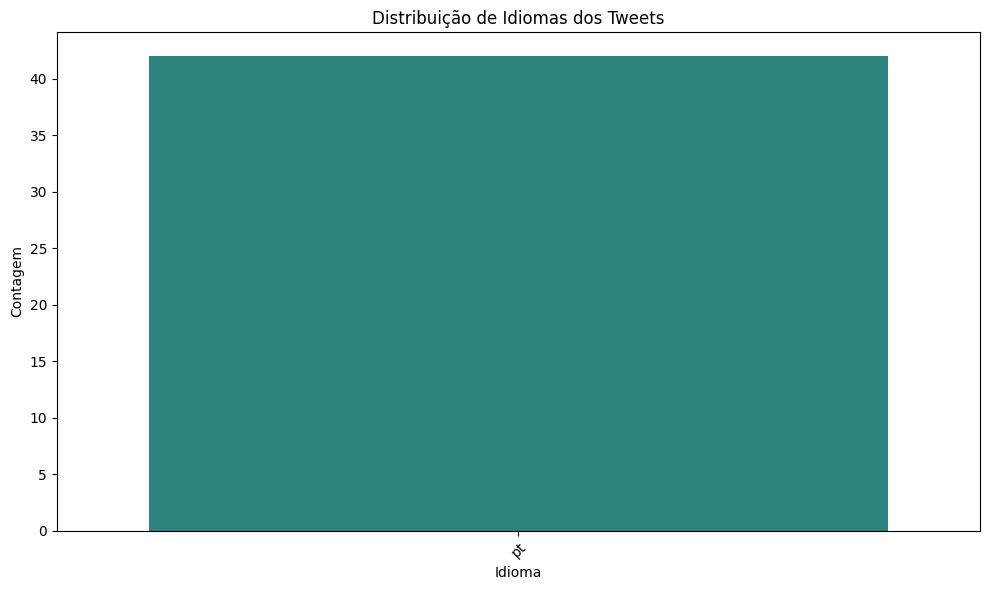


=== LINHA DO TEMPO DOS TWEETS ===


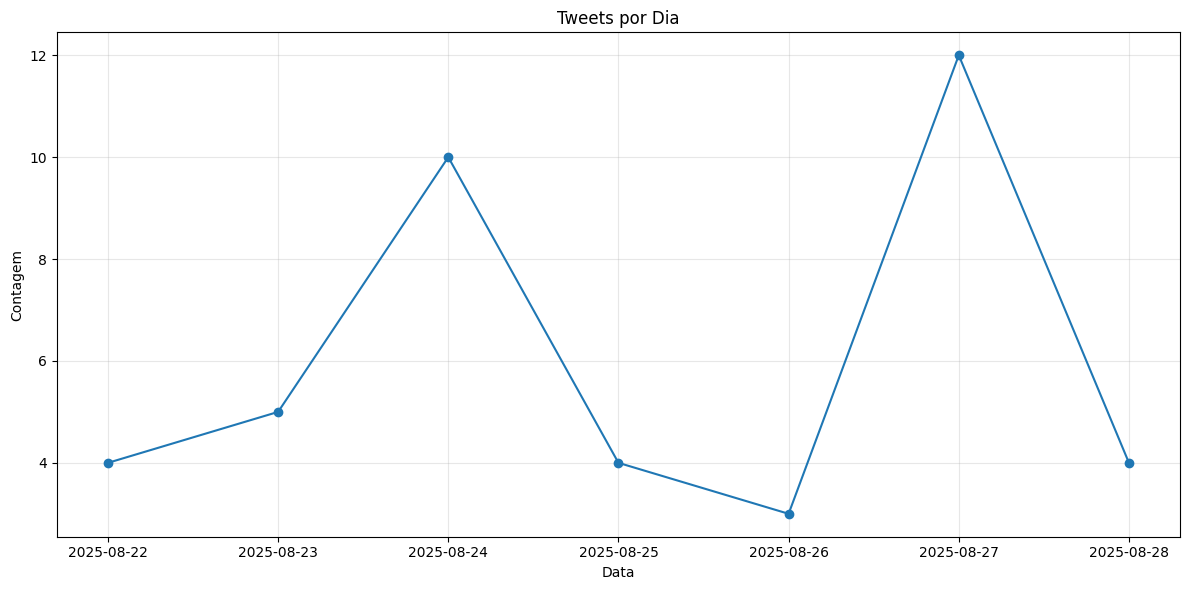

In [30]:
bearer_token = "Só quer mamão só quer mel? Acha que é fácil fabricar papel? Só quer presente, só quer noel? Acha que é facil fabricar o mel?"
query = "#wandinha lang:pt -is:retweet"
max_results = 100 # por algum motivo místico do universo ele só acha 44 tweets, fiz até outra conta e deu na mesma

df = search_tweets(bearer_token, query, max_results)

if df is not None and not df.empty:
    # Exibe os resultados no notebook
    print("\n=== RESULTADOS DA BUSCA ===")
    display(df)

    # Salva em CSV
    csv_filename = "tweets_wandinha.csv"
    df.to_csv(csv_filename, index=False, encoding='utf-8')
    print(f"\nArquivo CSV salvo: {csv_filename}")
    files.download(csv_filename)

    # distribuição de idiomas
    print("\n=== DISTRIBUIÇÃO DE IDIOMAS DOS TWEETS ===")
    lang_counts = df['lang'].value_counts()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=lang_counts.index, y=lang_counts.values, palette='viridis')
    plt.title('Distribuição de Idiomas dos Tweets')
    plt.xlabel('Idioma')
    plt.ylabel('Contagem')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # linha do tempo
    print("\n=== LINHA DO TEMPO DOS TWEETS ===")
    df['created_at'] = pd.to_datetime(df['created_at'])
    df['date'] = df['created_at'].dt.date
    date_counts = df['date'].value_counts().sort_index()
    plt.figure(figsize=(12, 6))
    plt.plot(date_counts.index, date_counts.values, marker='o', linestyle='-')
    plt.title('Tweets por Dia')
    plt.xlabel('Data')
    plt.ylabel('Contagem')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

else:
    print("\nDICAS PARA SOLUÇÃO DE PROBLEMAS:")
    print("1. Verifique se seu bearer token foi inserido corretamente e é válido.")
    print("2. Garanta que você tem o nível de acesso 'Essential' ou superior na plataforma de desenvolvedor do Twitter.")
    print("3. Tente uma query mais simples, como apenas '#wandinha'.")
    print("4. Aguarde alguns minutos antes de tentar novamente se atingiu o limite de requisições.")

# Análise de Sentimentos

1.  **VADER (em Português):** Aplicado diretamente no texto original.
2.  **VADER (em Inglês):** Aplicado no texto traduzido.
3.  **BERT (em Inglês):** Modelo Transformer aplicado no texto traduzido.
4.  **XLM-RoBERTa (Multilíngue):** Modelo Transformer aplicado diretamente no texto original.
5.  **BERTimbau (em Português):** Modelo Transformer focado em português, aplicado no texto original.


In [31]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## Carrega o csv


In [32]:
filename = "tweets_wandinha.csv"

df = pd.read_csv(filename)

print(f'{filename} carregado')
display(df.head())

tweets_wandinha.csv carregado


,id,text,created_at,lang,retweet_count,like_count
0,1961155447320178737,Boneca de pano Wandinha Naninha #wandinha via,2025-08-28 19:54:29+00:00,pt,0,0
1,1961118824989597909,Que playlist perfeita é essa? 🥹\n\n#Wandinha #...,2025-08-28 17:28:58+00:00,pt,0,0
2,1961118596970479865,"Mds, como estão falando tão pouco da segunda t...",2025-08-28 17:28:03+00:00,pt,0,0
3,1960906876347912428,E quem poderia imaginar que demorar entre uma ...,2025-08-28 03:26:45+00:00,pt,0,0
4,1960816792689107034,Novo pôster para a segunda temporada de #Wandi...,2025-08-27 21:28:48+00:00,pt,2,9


## Passo 4: Carregamento e Verificação dos Dados

Carregamos os dados do arquivo CSV para um DataFrame do Pandas e verificamos as primeiras linhas.

In [33]:
# Garante que o texto exista
if 'text' in df.columns:
    df['texto_original'] = df['text']
elif 'texto_original' not in df.columns:
    raise ValueError("sem texto")

print(f"Carregados {len(df)} tweets.")
display(df[['texto_original']].head())

Carregados 42 tweets.


,texto_original
0,Boneca de pano Wandinha Naninha #wandinha via
1,Que playlist perfeita é essa? 🥹\n\n#Wandinha #...
2,"Mds, como estão falando tão pouco da segunda t..."
3,E quem poderia imaginar que demorar entre uma ...
4,Novo pôster para a segunda temporada de #Wandi...


## Tradução dos Tweets para Inglês

In [34]:
def traduzir_para_ingles(textos, max_retries=2):
    translator = Translator()
    traducoes = []

    for i, texto in enumerate(textos):
        print(f'Traduzindo texto {i+1}/{len(textos)}...', end='\r')
        for retry in range(max_retries):
            try:
                traducao = translator.translate(texto, src='pt', dest='en').text
                traducoes.append(traducao)
                time.sleep(0.5)  # Pausa para API não explodir
                break
            except Exception as e:
                if retry == max_retries - 1:
                    traducoes.append(texto)
                    print(f"\nErro: {texto[:30]}... - Erro: {str(e)}")
                else:
                    time.sleep(2)
    return traducoes

df['texto_traduzido'] = traduzir_para_ingles(df['texto_original'].tolist())

translation_sample = pd.DataFrame({
    'Original (Português)': df['texto_original'].head(),
    'Traduzido (Inglês)': df['texto_traduzido'].head()
})
display(translation_sample)

,Original (Português),Traduzido (Inglês)
0,Boneca de pano Wandinha Naninha #wandinha via,Wandinha naninha cloth doll #wandinha via
1,Que playlist perfeita é essa? 🥹\n\n#Wandinha #...,What perfect playlist is this?🥹\n\n#Wandinha #...
2,"Mds, como estão falando tão pouco da segunda t...","MDS, how are you talking so little about the s..."
3,E quem poderia imaginar que demorar entre uma ...,And who could imagine that it takes between se...
4,Novo pôster para a segunda temporada de #Wandi...,New poster for the second season of #Wandinha ...


## Funções de Análise de Sentimento

In [35]:
def classificar_sentimento(score):
    if score >= 0.05:
        return "Positivo"
    elif score <= -0.05:
        return "Negativo"
    else:
        return "Neutro"

def analisar_vader(textos):
    sid = SentimentIntensityAnalyzer()
    resultados = []
    for texto in textos:
        ss = sid.polarity_scores(texto)
        compound = ss['compound']
        sentimento = classificar_sentimento(compound)
        resultados.append((sentimento, compound))
    return resultados

def analisar_bert_en(textos_traduzidos):
    try:
        model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
        sentiment_classifier = pipeline("sentiment-analysis", model=model_name)
        resultados = []
        for texto in textos_traduzidos:
            try:
                texto_curto = texto[:512] # Limita o tamanho pro bertinho não explodir
                resultado = sentiment_classifier(texto_curto)[0]
                score = resultado['score']
                label = resultado['label']
                if '5' in label or '4' in label: sentimento = "Positivo"
                elif '1' in label or '2' in label: sentimento = "Negativo"
                else: sentimento = "Neutro"
                resultados.append((sentimento, score))
            except Exception as e:
                resultados.append(("Erro", 0.0))
        return resultados
    except Exception as e:
        print(f"Erro ao carregar o modelo BERT: {e}")
        return [("Erro", 0.0) for _ in textos_traduzidos]

def analisar_xlm_roberta(textos):
    try:
        model_name = "cardiffnlp/twitter-xlm-roberta-base-sentiment"
        sentiment_classifier = pipeline("sentiment-analysis", model=model_name)
        resultados = []
        for texto in textos:
            try:
                texto_curto = texto[:512]
                resultado = sentiment_classifier(texto_curto)[0]
                label = resultado['label']
                score = resultado['score']
                if label == "Positive": sentimento, valor_score = "Positivo", score
                elif label == "Negative": sentimento, valor_score = "Negativo", -score
                else: sentimento, valor_score = "Neutro", 0.0
                resultados.append((sentimento, valor_score))
            except Exception as e:
                resultados.append(("Erro", 0.0))
        return resultados
    except Exception as e:
        print(f"Erro ao carregar o modelo XLM-RoBERTa: {e}")
        return [("Erro", 0.0) for _ in textos]

def analisar_bertimbau_pt(textos):
    try:
        model_name = "rufimelo/Legal-BERTimbau-base"
        sentiment_classifier = pipeline("sentiment-analysis", model=model_name)
        resultados = []
        emocoes_positivas = ['alegria', 'amor', 'admiração', 'aprovação', 'entusiasmo', 'gratidão', 'orgulho', 'diversão', 'desejo']
        emocoes_negativas = ['raiva', 'nojo', 'medo', 'tristeza', 'decepção', 'desaprovação', 'irritação', 'luto']
        for texto in textos:
            try:
                texto_curto = texto[:512] # O berimbau tambem não aguenta tadinho
                resultado = sentiment_classifier(texto_curto)[0]
                label = resultado['label']
                score = resultado['score']
                if label in emocoes_positivas: sentimento = "Positivo"
                elif label in emocoes_negativas: sentimento = "Negativo"
                else: sentimento = "Neutro"
                resultados.append((sentimento, score))
            except Exception as e:
                resultados.append(("Erro", 0.0))
        return resultados
    except Exception as e:
        print(f"Erro ao carregar o modelo BERTimbau: {e}")
        return [("Erro", 0.0) for _ in textos]

## Aplicação e Análise

In [36]:
print("Aplicando VADER nos textos em português...")
df['vader_pt_sentimento'], df['vader_pt_score'] = zip(*analisar_vader(df['texto_original']))

print("Aplicando VADER nos textos em inglês...")
df['vader_en_sentimento'], df['vader_en_score'] = zip(*analisar_vader(df['texto_traduzido']))

print("Aplicando BERT nos textos em inglês...")
df['bert_en_sentimento'], df['bert_en_score'] = zip(*analisar_bert_en(df['texto_traduzido']))

print("Aplicando XLM-RoBERTa (multilíngue)...")
df['xlm_roberta_sentimento'], df['xlm_roberta_score'] = zip(*analisar_xlm_roberta(df['texto_original']))

print("Aplicando BERTimbau nos textos em português...")
df['bertimbau_sentimento'], df['bertimbau_score'] = zip(*analisar_bertimbau_pt(df['texto_original']))

# a robertinha e o berimbau não funcionam, e só Deus sabe o motivo

csv_completo = "analise_sentimentos_completa.csv"
df.to_csv(csv_completo, index=False)
files.download(csv_completo)
print(f"\nAnálise completa salva em '{csv_completo}'")

Aplicando VADER nos textos em português...
Aplicando VADER nos textos em inglês...
Aplicando BERT nos textos em inglês...


Device set to use cpu


Aplicando XLM-RoBERTa (multilíngue)...


Device set to use cpu


Aplicando BERTimbau nos textos em português...


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at rufimelo/Legal-BERTimbau-base and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use cpu


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Análise completa salva em 'analise_sentimentos_completa.csv'


## Tabela Comparativa



In [37]:
tabela_final = pd.DataFrame()
tabela_final['Tweet'] = df['texto_original']
tabela_final['VADER PT'] = df['vader_pt_sentimento'] + " (" + df['vader_pt_score'].round(2).astype(str) + ")"
tabela_final['VADER EN'] = df['vader_en_sentimento'] + " (" + df['vader_en_score'].round(2).astype(str) + ")"
tabela_final['BERT EN'] = df['bert_en_sentimento'] + " (" + df['bert_en_score'].round(2).astype(str) + ")"
tabela_final['XLM-RoBERTa'] = df['xlm_roberta_sentimento'] + " (" + df['xlm_roberta_score'].round(2).astype(str) + ")"
tabela_final['BERTimbau PT'] = df['bertimbau_sentimento'] + " (" + df['bertimbau_score'].round(2).astype(str) + ")"

csv_comparativo = "comparacao_sentimentos.csv"
tabela_final.to_csv(csv_comparativo, index=False)
files.download(csv_comparativo)
print(f"Tabela comparativa salva em '{csv_comparativo}'")

display(HTML(tabela_final.to_html(index=False)))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tabela comparativa salva em 'comparacao_sentimentos.csv'


Tweet,VADER PT,VADER EN,BERT EN,XLM-RoBERTa,BERTimbau PT
Boneca de pano Wandinha Naninha #wandinha via,Neutro (0.0),Neutro (0.0),Negativo (0.26),Neutro (0.0),Neutro (0.52)
Que playlist perfeita é essa? 🥹\n\n#Wandinha #wednesdaynetflix #WednesdaySeason2,Neutro (0.0),Positivo (0.57),Positivo (0.7),Neutro (0.0),Neutro (0.53)
"Mds, como estão falando tão pouco da segunda temporada de #Wandinha ?\nTá muitooo linda, principalmente a interação de mãe e filha... Aaaaah!\n\n#wednesdaynetflix #MorticiaAddams",Neutro (0.0),Positivo (0.67),Positivo (0.43),Neutro (0.0),Neutro (0.53)
E quem poderia imaginar que demorar entre uma temporada e outra faria o público perder o interesse?! #Wandinha,Neutro (0.0),Negativo (-0.46),Negativo (0.29),Neutro (0.0),Neutro (0.53)
Novo pôster para a segunda temporada de #Wandinha 🖤\n\nA primeira parte está disponível na enquanto que a parte 2 chegará em setembro. 😉,Neutro (0.0),Neutro (0.0),Positivo (0.45),Neutro (0.0),Neutro (0.53)
"Como está a liberdade de expressão na plataforma, voltei, depois de alguns anos de banimento, por quanto tempo, não sei !!!!!!!😀✌🏼 #Gaza #liberdade #STF #SoberaniaNacional #piorcongressodahistoria #bolsonaronacadeiajá #wandinha 😂",Neutro (0.0),Positivo (0.75),Negativo (0.65),Neutro (0.0),Neutro (0.54)
Eu não consigo para de desenhar elas!\n🌙☀️ #Morissa\n\n#Wandinha #wednesday #larissaweems #MorticiaAddams #GwendolineChristie #catherineZetaJones #MorticiaxLarissa #fanart,Neutro (0.0),Positivo (0.29),Negativo (0.46),Neutro (0.0),Neutro (0.53)
‘Wandinha’: Netflix divulga novo pôster para a segunda parte da temporada; veja. #Netflix #Wandinha #TVCultura,Neutro (0.0),Neutro (0.0),Positivo (0.26),Neutro (0.0),Neutro (0.54)
"Morro com o povo comparando #Wandinha com #StrangerThings, Wandinha demorou por vontade própria da Netflix, Stranger Things 5 teve vários empecilhos no meio do caminho, como a greve de roteiristas e a pandemia, sem contar ué Stranger Things é Stranger Things né, a mais mais.",Negativo (-0.3),Negativo (-0.79),Negativo (0.34),Neutro (0.0),Neutro (0.52)
📌 A Netflix lançou o pôster da Parte 2 da 2ª temporada de #Wandinha.\n\n Lady Gaga vem aí!,Neutro (0.0),Positivo (0.2),Positivo (0.46),Neutro (0.0),Neutro (0.53)


## Visualizações

-   Distribuição de sentimentos por método.
-   Scores médios de cada método.
-   Mapa de calor da concordância entre os métodos.

Gerando visualizações...


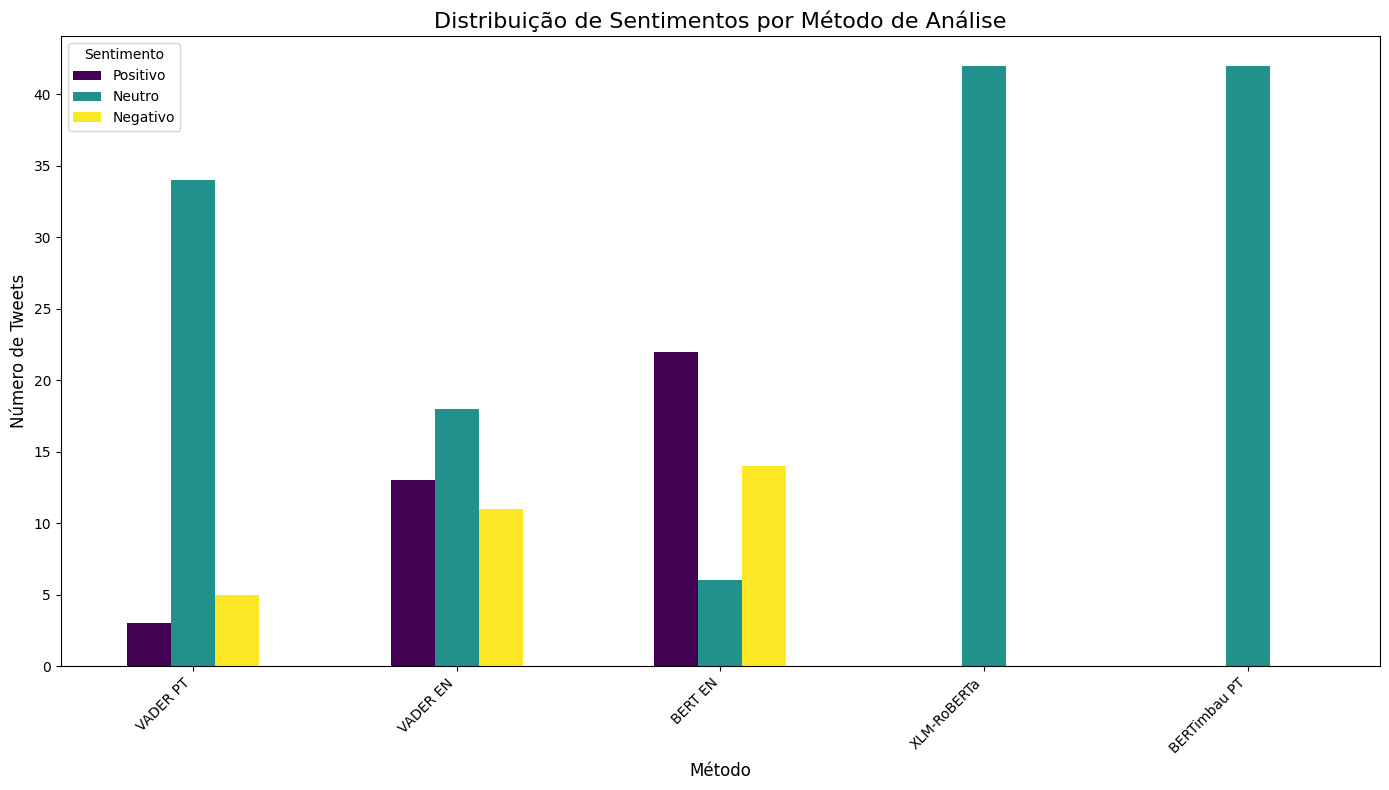

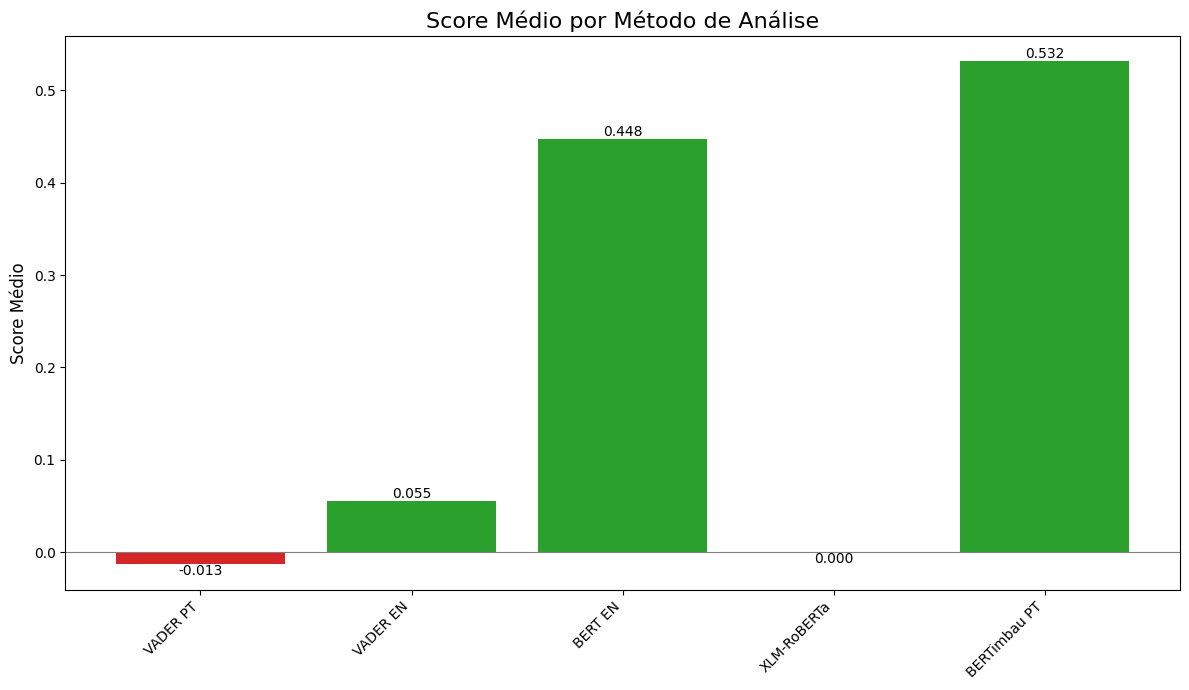

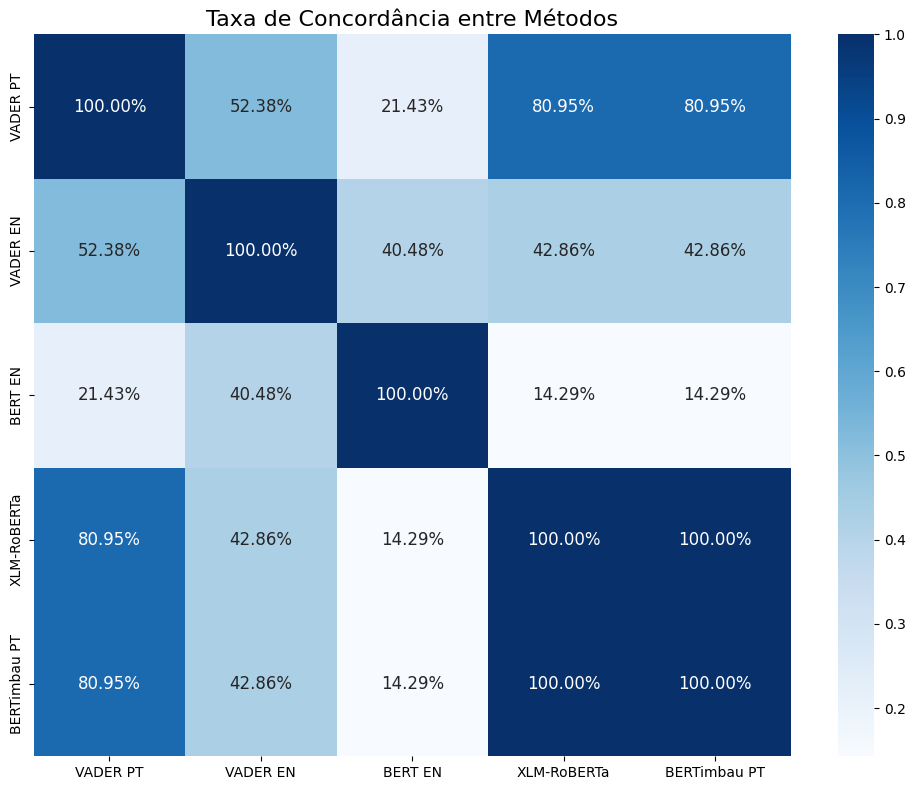

In [38]:
print("Gerando visualizações...")

# --- Gráfico 1: Distribuição de Sentimentos ---
metodos = ['VADER PT', 'VADER EN', 'BERT EN', 'XLM-RoBERTa', 'BERTimbau PT']
colunas_sentimento = ['vader_pt_sentimento', 'vader_en_sentimento', 'bert_en_sentimento', 'xlm_roberta_sentimento', 'bertimbau_sentimento']

contagens = {metodo: df[coluna].value_counts() for metodo, coluna in zip(metodos, colunas_sentimento)}
df_plot = pd.DataFrame(contagens).fillna(0).transpose()[['Positivo', 'Neutro', 'Negativo']]

ax = df_plot.plot(kind='bar', figsize=(14, 8), colormap='viridis')
plt.title('Distribuição de Sentimentos por Método de Análise', fontsize=16)
plt.xlabel('Método', fontsize=12)
plt.ylabel('Número de Tweets', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentimento')
plt.tight_layout()
plt.savefig('distribuicao_sentimentos.png')
plt.show()

# --- Gráfico 2: Scores Médios ---
scores_medios = {
    'VADER PT': df['vader_pt_score'].mean(),
    'VADER EN': df['vader_en_score'].mean(),
    'BERT EN': df['bert_en_score'].mean(),
    'XLM-RoBERTa': df['xlm_roberta_score'].mean(),
    'BERTimbau PT': df['bertimbau_score'].mean()
}

plt.figure(figsize=(12, 7))
cores = ['#2ca02c' if v > 0 else '#d62728' for v in scores_medios.values()]
bars = plt.bar(scores_medios.keys(), scores_medios.values(), color=cores)
plt.axhline(0, color='grey', linewidth=0.8)
plt.title('Score Médio por Método de Análise', fontsize=16)
plt.ylabel('Score Médio', fontsize=12)
plt.xticks(rotation=45, ha='right')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.3f}', va='bottom' if yval > 0 else 'top', ha='center')
plt.tight_layout()
plt.savefig('scores_medios.png')
plt.show()

# --- Gráfico 3: Concordância entre Métodos ---
concordancia = pd.DataFrame(index=metodos, columns=metodos, dtype=float)
for i, c1 in enumerate(colunas_sentimento):
    for j, c2 in enumerate(colunas_sentimento):
        concordancia.iloc[i, j] = (df[c1] == df[c2]).mean()

plt.figure(figsize=(10, 8))
sns.heatmap(concordancia, annot=True, cmap='Blues', fmt='.2%', annot_kws={"size": 12})
plt.title('Taxa de Concordância entre Métodos', fontsize=16)
plt.tight_layout()
plt.savefig('concordancia_metodos.png')
plt.show()

## Estatísticas Resumidas


In [39]:
# @title Summary Statistics
# Calculate sentiment distribution for each method
sentiment_counts = {metodo: df[coluna].value_counts() for metodo, coluna in zip(metodos, colunas_sentimento)}

display(Markdown("## Resumo da Análise de Sentimentos"))
display(Markdown("### Distribuição por Método"))

for method, counts in sentiment_counts.items():
    total = counts.sum()  # Use .sum() instead of sum(counts.values())
    if total == 0: continue
    positive = counts.get('Positivo', 0)
    neutral = counts.get('Neutro', 0)
    negative = counts.get('Negativo', 0)

    display(Markdown(f"**{method}**: ({total} tweets)"))
    display(Markdown(f"- Positivo: {positive} ({positive/total:.1%}) | Neutro: {neutral} ({neutral/total:.1%}) | Negativo: {negative} ({negative/total:.1%})"))
    display(Markdown("---"))

display(Markdown("### Scores Médios"))
for method, score in scores_medios.items():
    display(Markdown(f"- **{method}**: {score:.3f}"))

## Resumo da Análise de Sentimentos

### Distribuição por Método

**VADER PT**: (42 tweets)

- Positivo: 3 (7.1%) | Neutro: 34 (81.0%) | Negativo: 5 (11.9%)

---

**VADER EN**: (42 tweets)

- Positivo: 13 (31.0%) | Neutro: 18 (42.9%) | Negativo: 11 (26.2%)

---

**BERT EN**: (42 tweets)

- Positivo: 22 (52.4%) | Neutro: 6 (14.3%) | Negativo: 14 (33.3%)

---

**XLM-RoBERTa**: (42 tweets)

- Positivo: 0 (0.0%) | Neutro: 42 (100.0%) | Negativo: 0 (0.0%)

---

**BERTimbau PT**: (42 tweets)

- Positivo: 0 (0.0%) | Neutro: 42 (100.0%) | Negativo: 0 (0.0%)

---

### Scores Médios

- **VADER PT**: -0.013

- **VADER EN**: 0.055

- **BERT EN**: 0.448

- **XLM-RoBERTa**: 0.000

- **BERTimbau PT**: 0.532

## Download dos Resultados


In [40]:
files.download('distribuicao_sentimentos.png')
files.download('scores_medios.png')
files.download('concordancia_metodos.png')

print("Análise concluída! Todos os arquivos de dados e visualizações foram baixados.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Análise concluída! Todos os arquivos de dados e visualizações foram baixados.
